In [1]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Individual State Plots

In [2]:
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
df = pd.read_csv(url, parse_dates=True)
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [3]:
states = df['state'].unique()
len(states)

55

In [13]:
for state in states:
    df_state = df[df['state']==state]

    dates = df_state['date']
    new_dates = dates[1:]
    cases = df_state['cases']
    new_cases = np.diff(cases)
    new_df = pd.DataFrame({'date': new_dates, 
              'new_cases': new_cases})

    date_seventh = df_state['date'][::14]
    rolling_cases = new_df['new_cases'].rolling(7).mean()
    
    fig, ax = plt.subplots(figsize=(10, 8))

    right_side = ax.spines['right']
    right_side.set_visible(False)
    left_side = ax.spines['left']
    # left_side.set_visible(False)
    top_side = ax.spines['top']
    top_side.set_visible(False)
    bottom_side = ax.spines['bottom']
    # bottom_side.set_visible(False)

    line = plt.plot(new_df['date'], rolling_cases, color=(0.47, 0.40, 0.60))
    bar = plt.bar(new_df['date'], new_df['new_cases'], color=(0.47, 0.40, 0.60), alpha=0.1, width=1)
    plt.xticks(ticks=date_seventh[1:], rotation=45, fontname='Arial', fontsize=10)
    # plt.title(f'New COVID-19 Cases {state}')
    plt.ylabel('Cases (N)', fontname='Arial', fontsize=12)
    plt.xlabel('Date', fontname='Arial', fontsize=12)
    plt.fill_between(new_df['date'], rolling_cases, color=(0.47, 0.40, 0.60), alpha=0.5)
    plt.legend(line, ('7 Day Rolling Average',), loc='upper left', frameon=False)
    plt.savefig(f'plots/{state}_bar_roll_plot.png', dpi=None, facecolor='w', edgecolor='w', orientation='portrait')

    # plt.show()
    plt.close()

## US Plot Below

In [14]:
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [15]:
df_us = df.groupby(['date']).sum()
df_us = df_us.reset_index()
us_cases = df_us['cases']
us_dates = df_us['date']
us_deaths = df_us['deaths']
new_us_dates = us_dates[1:]

new_us_cases = np.diff(us_cases)
new_df = pd.DataFrame({'date': new_us_dates, 
                       'new_cases': new_us_cases})

us_rolling_cases = new_df['new_cases'].rolling(7).mean()

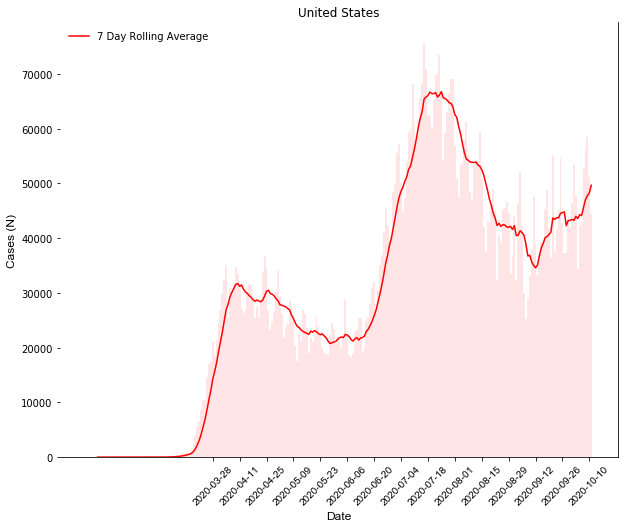

In [16]:
fig, ax = plt.subplots(figsize=(10, 8))

right_side = ax.spines['right']
#right_side.set_visible(False)
left_side = ax.spines['left']
left_side.set_visible(False)
top_side = ax.spines['top']
top_side.set_visible(False)
bottom_side = ax.spines['bottom']
#bottom_side.set_visible(False)

us_line = plt.plot(new_us_dates, us_rolling_cases, color='r')
plt.bar(new_us_dates, new_us_cases, color='r', alpha=0.1, width=1)
plt.xticks(ticks=date_seventh, rotation=45, fontname='Arial', fontsize=10)
plt.title(f'United States')
plt.ylabel('Cases (N)', fontname='Arial', fontsize=12)
plt.xlabel('Date', fontname='Arial', fontsize=12)
# plt.fill_between(dates, us_rolling_cases, color=(0.47, 0.40, 0.60), alpha=0.5)
plt.legend(us_line, ('7 Day Rolling Average',), loc='upper left', frameon=False)
plt.savefig(f'plots/us_bar_roll_plot.png', dpi=None, facecolor='w', edgecolor='w', orientation='portrait')

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

right_side = ax.spines['right']
right_side.set_visible(False)
left_side = ax.spines['left']
left_side.set_visible(False)
top_side = ax.spines['top']
top_side.set_visible(False)
bottom_side = ax.spines['bottom']
bottom_side.set_visible(False)

us_line = plt.plot(us_dates, us_deaths, color='r')
# plt.bar(new_us_dates, new_us_cases, color='r', alpha=0.1, width=1)
plt.xticks(ticks=date_seventh[1:13], rotation=45, fontname='Arial', fontsize=10)
plt.title(f'United States')
plt.ylabel('Cases (N)', fontname='Arial', fontsize=12)
plt.xlabel('Date', fontname='Arial', fontsize=12)
# plt.fill_between(dates, us_rolling_cases, color=(0.47, 0.40, 0.60), alpha=0.5)
plt.legend(us_line, ('Deaths from COVID-19',), loc='upper left', frameon=False)
plt.savefig(f'plots/us_deaths_plot.png', dpi=None, facecolor='w', edgecolor='w', orientation='portrait')

plt.show()